# Import

In [464]:
import pandas as pd
import numpy as np
import plotly.express as px
import ast
import re

# Data import

In [737]:
movie_df = pd.read_csv('F:\\For work\\Data set\\movies.csv')
print("Therer are {} rows in the dataset".format(movie_df.shape[0]))

Therer are 9999 rows in the dataset


## EDA

In [738]:
movie_df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [739]:
# lower case all columns
movie_df.columns = movie_df.columns.str.lower()

In [740]:
#Check the columns

movie_df.columns
print("The columns in the dataset are: ", movie_df.columns)

The columns in the dataset are:  Index(['movies', 'year', 'genre', 'rating', 'one-line', 'stars', 'votes',
       'runtime', 'gross'],
      dtype='object')


In [741]:
# Check missing values in all columns

movie_df.isnull().sum()
print("The missing values in the dataset are: ", movie_df.isnull().sum())

The missing values in the dataset are:  movies         0
year         644
genre         80
rating      1820
one-line       0
stars          0
votes       1820
runtime     2958
gross       9539
dtype: int64


In [742]:
# Check type of value in each column

movie_df.dtypes
print("The data types in the dataset are: ", movie_df.dtypes)

The data types in the dataset are:  movies       object
year         object
genre        object
rating      float64
one-line     object
stars        object
votes        object
runtime     float64
gross        object
dtype: object


In [743]:
movie_df['movies'].value_counts()

movies
 Bleach: Burîchi                         65
 Mighty Little Bheem                     64
 Avatar: The Last Airbender              61
 La Reina de Indias y el Conquistador    60
 Dexter                                  48
                                         ..
Ashby                                     1
Syucheu                                   1
#Realityhigh                              1
Eobiseu                                   1
 Heart of Invictus                        1
Name: count, Length: 6817, dtype: int64

In [744]:
# Check the number of unique values in each column

movie_df.nunique()

movies      6817
year         438
genre        510
rating        82
one-line    8688
stars       7877
votes       4129
runtime      261
gross        332
dtype: int64

In [745]:
# check year column

movie_df['year'].value_counts()

year
(2020– )           892
(2021– )           658
(2020)             639
(2019– )           549
(2019)             544
                  ... 
(1999– )             1
(I) (2013–2016)      1
(2002–2005)          1
(2010–2015)          1
(1985– )             1
Name: count, Length: 438, dtype: int64

In [746]:
# Check for duplicate rows

movie_df.duplicated().sum()

431

In [747]:
# see the duplicated rows

movie_df[movie_df.duplicated()]

,movies,year,genre,rating,one-line,stars,votes,runtime,gross
6833,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",NaN,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",NaN,NaN,NaN
6835,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",9.0,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",6,NaN,NaN
6836,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",9.0,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",6,NaN,NaN
6837,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",NaN,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",NaN,NaN,NaN
6838,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",NaN,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9989,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN,NaN
9990,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN,NaN
9991,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN,NaN
9992,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN,NaN


## Data Cleaning and Transformation

In [748]:
def clean_text(str):
    text = re.sub(r'\n', '', str)
    text = text.strip()

    return text 

movie_df['movies'] = movie_df['movies'].apply(clean_text)
movie_df['one-line'] = movie_df['one-line'].apply(clean_text)    

In [749]:
#remove /n from genre column

movie_df['genre'] = movie_df['genre'].str.replace('\n', '')

In [750]:
def split_genre(genre_column):
    """Function to split comma-separated genre values into a list.

    Args:
        genre_column (Series): The 'genre' column of the DataFrame.

    Returns:
        Series: 'genre' column with values converted into lists.
    """
    return genre_column.str.split(', ')

movie_df['genre'] = split_genre(movie_df['genre'])

In [751]:
def clean_year_column(year_column):
    """Function to clean the 'year' column of a DataFrame.

    Args:
        year_column (Series): The 'year' column of the DataFrame.

    Returns:
        Series: Cleaned 'year' column.
    """
    # Remove parentheses and extra characters
    year_column = year_column.str.replace(r'[\(\)I]', '', regex=True)
    
    # Fill missing values with empty string
    year_column.fillna('', inplace=True)
    
    # Split the string by '–' and keep the first part if present
    year_column = year_column.apply(lambda x: x.split('–')[0] if '–' in x else x)
    
    # Extract the year using regex
    year_column = year_column.str.extract('(\d+)')
    
    return year_column

# Applying the function to the 'year' column of the DataFrame
movie_df['year'] = clean_year_column(movie_df['year'])


<>:20: SyntaxWarning: invalid escape sequence '\d'
<>:20: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Junior\AppData\Local\Temp\ipykernel_7404\3958081784.py:20: SyntaxWarning: invalid escape sequence '\d'
  year_column = year_column.str.extract('(\d+)')


In [752]:
movie_df.head()

,movies,year,genre,rating,one-line,stars,votes,runtime,gross
0,Blood Red Sky,2021,"[Action, Horror, Thriller ]",6.1,A woman with a mysterious illness is forced in...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,2021,"[Animation, Action, Adventure ]",5.0,The war for Eternia begins again in what may b...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,2010,"[Drama, Horror, Thriller ]",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,2013,"[Animation, Adventure, Comedy ]",9.2,An animated series that follows the exploits o...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,2021,"[Action, Crime, Horror ]",NaN,"A prequel, set before the events of Army of th...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [753]:
movie_df.shape

(9999, 9)

In [754]:
# drop subset gross 

movie_df.dropna(subset=['gross'], inplace=True)

In [755]:
movie_df.shape

(460, 9)

In [756]:
# search the row where stars columns contains this pattern

patern = r'Directors:\s*([^|]*)'

check = movie_df['stars'].str.contains(patern, case=False, na=False)

movie_df[check]

C:\Users\Junior\AppData\Local\Temp\ipykernel_7404\493429858.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  check = movie_df['stars'].str.contains(patern, case=False, na=False)


,movies,year,genre,rating,one-line,stars,votes,runtime,gross
226,Captain America: Civil War,2016,"[Action, Adventure, Sci-Fi ]",7.8,Political involvement in the Avengers' affairs...,"\n Directors:\nAnthony Russo, \nJoe Russo\n...","697,750",147.0,$408.08M
271,Pirates of the Caribbean: Dead Men Tell No Tales,2017,"[Action, Adventure, Fantasy ]",6.5,Captain Jack Sparrow is pursued by old rival C...,"\n Directors:\nJoachim Rønning, \nEspen San...","276,173",129.0,$172.56M
351,Frozen,2013,"[Animation, Adventure, Comedy ]",7.4,When the newly crowned Queen Elsa accidentally...,"\n Directors:\nChris Buck, \nJennifer Lee\n...","586,769",102.0,$400.74M
385,There's Something About Mary,1998,"[Comedy, Romance ]",7.1,A man gets a chance to meet up with his dream ...,"\n Directors:\nBobby Farrelly, \nPeter Farr...","298,729",119.0,$176.48M
421,Sausage Party,2016,"[Animation, Adventure, Comedy ]",6.1,A sausage strives to discover the truth about ...,"\n Directors:\nGreg Tiernan, \nConrad Verno...","181,775",89.0,$97.69M
465,Kung Fu Panda 3,2016,"[Animation, Action, Adventure ]",7.1,"Continuing his ""legendary adventures of awesom...","\n Directors:\nAlessandro Carloni, \nJennif...","141,657",95.0,$143.53M
508,The Croods,2013,"[Animation, Adventure, Comedy ]",7.2,"After their cave is destroyed, a caveman famil...","\n Directors:\nKirk DeMicco, \nChris Sander...","200,206",98.0,$187.17M
525,Monty Python and the Holy Grail,1975,"[Adventure, Comedy, Fantasy ]",8.2,King Arthur and his Knights of the Round Table...,"\n Directors:\nTerry Gilliam, \nTerry Jones...","513,289",91.0,$1.23M
576,Beauty and the Beast,1991,"[Animation, Family, Fantasy ]",8.0,A prince cursed to spend his days as a hideous...,"\n Directors:\nGary Trousdale, \nKirk Wise\...","425,384",84.0,$218.97M
578,Finding Dory,2016,"[Animation, Adventure, Comedy ]",7.3,Friendly but forgetful blue tang Dory begins a...,"\n Directors:\nAndrew Stanton, \nAngus MacL...","250,953",97.0,$486.30M


In [757]:
#Check the movie name 'Theo Who Lived'


check = movie_df[movie_df['movies'] == 'Theo Who Lived']

check

,movies,year,genre,rating,one-line,stars,votes,runtime,gross
6056,Theo Who Lived,2016,[Documentary ],6.8,A documentary on American journalist Theo Padn...,\n Director:\nDavid Schisgall\n| \n Star...,111,86.0,$0.01M


In [758]:
check.iloc[0][5]

C:\Users\Junior\AppData\Local\Temp\ipykernel_7404\1279556772.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  check.iloc[0][5]


'\n    Director:\nDavid Schisgall\n| \n    Star:\nTheo Padnos\n'

In [759]:
import re

director_pattern = r'Director:\s*([^|]*)'
director_pattern2 = r'Directors?:\s*([^|]*)'  # Updated pattern for multiple directors

def extract_director(stars):
    """ Function to extract the director from the stars column

    Args:
        stars (column): feed the stars columns to extract the director

    Returns:
        directors: return the director name from the stars column
    """
    pattern1 = director_pattern
    pattern2 = director_pattern2
    
    for pattern in [pattern1, pattern2]:
        directors = re.findall(pattern, stars)  
        if directors:
            return ', '.join(directors)

# Example usage
movie_df['director'] = movie_df['stars'].apply(extract_director)
movie_df['director'] = movie_df['director'].str.replace('\n', '')


In [760]:
movie_df

,movies,year,genre,rating,one-line,stars,votes,runtime,gross,director
77,The Hitman's Bodyguard,2017,"[Action, Comedy, Crime ]",6.9,"The world's top bodyguard gets a new client, a...",\n Director:\nPatrick Hughes\n| \n Stars...,"205,979",118.0,$75.47M,Patrick Hughes
85,Jurassic Park,1993,"[Action, Adventure, Sci-Fi ]",8.1,A pragmatic paleontologist visiting an almost ...,\n Director:\nSteven Spielberg\n| \n Sta...,"897,444",127.0,$402.45M,Steven Spielberg
95,Don't Breathe,2016,"[Crime, Horror, Thriller ]",7.1,"Hoping to walk away with a massive fortune, a ...",\n Director:\nFede Alvarez\n| \n Stars:\...,"237,601",88.0,$89.22M,Fede Alvarez
111,The Lord of the Rings: The Fellowship of the Ring,2001,"[Action, Adventure, Drama ]",8.8,A meek Hobbit from the Shire and eight compani...,\n Director:\nPeter Jackson\n| \n Stars:...,"1,713,028",178.0,$315.54M,Peter Jackson
125,Escape Room,2019,"[Action, Adventure, Horror ]",6.4,Six strangers find themselves in a maze of dea...,\n Director:\nAdam Robitel\n| \n Stars:\...,"99,351",99.0,$57.01M,Adam Robitel
...,...,...,...,...,...,...,...,...,...,...
5750,Vidal Sassoon: The Movie,2010,[Documentary ],6.5,Vidal Sassoon is more than just a hairdresser-...,\n Director:\nCraig Teper\n| \n Stars:\n...,245,90.0,$0.09M,Craig Teper
5770,Men at Lunch,2012,"[Documentary, Mystery ]",6.3,"The story of ""Lunch atop a Skyscraper,"" the ic...",\n Director:\nSeán Ó Cualáin\n| \n Stars...,331,75.0,$0.00M,Seán Ó Cualáin
5835,Decoding Deepak,2012,[Documentary ],5.5,"Deepak Chopra's son, Gotham, spends a year tra...",\n Director:\nGotham Chopra\n| \n Stars:...,124,83.0,$0.01M,Gotham Chopra
6056,Theo Who Lived,2016,[Documentary ],6.8,A documentary on American journalist Theo Padn...,\n Director:\nDavid Schisgall\n| \n Star...,111,86.0,$0.01M,David Schisgall


In [761]:
import re

def extract_stars(stars):
    """ Function to extract the stars from the stars column

    Args:
        stars (column): feed the stars columns to extract the stars

    Returns:
        stars: return the stars name from the stars column
    """
    pattern1 = r'Stars:\s*([^|]*)'
    pattern2 = r'Star:\s*(.*?)\n'
    
    all_stars = []
    for pattern in [pattern1, pattern2]:
        matches = re.findall(pattern, stars)
        if matches:
            all_stars.extend(matches)
    
    return ', '.join(all_stars)

# Applying the function to the 'stars' column
movie_df['stars'] = movie_df['stars'].apply(extract_stars)
movie_df['stars'] = movie_df['stars'].str.replace('\n', ',')
movie_df['stars'] = movie_df['stars'].str.strip().str.split(',').apply(lambda x: [star.strip() for star in x if star.strip()]) # Split the string by comma and remove leading/trailing whitespaces

In [762]:
movie_df.stars.iloc[0]

['Ryan Reynolds', 'Samuel L. Jackson', 'Gary Oldman', 'Elodie Yung']

In [763]:
movie_df.head()

,movies,year,genre,rating,one-line,stars,votes,runtime,gross,director
77,The Hitman's Bodyguard,2017,"[Action, Comedy, Crime ]",6.9,"The world's top bodyguard gets a new client, a...","[Ryan Reynolds, Samuel L. Jackson, Gary Oldman...","205,979",118.0,$75.47M,Patrick Hughes
85,Jurassic Park,1993,"[Action, Adventure, Sci-Fi ]",8.1,A pragmatic paleontologist visiting an almost ...,"[Sam Neill, Laura Dern, Jeff Goldblum, Richard...","897,444",127.0,$402.45M,Steven Spielberg
95,Don't Breathe,2016,"[Crime, Horror, Thriller ]",7.1,"Hoping to walk away with a massive fortune, a ...","[Stephen Lang, Jane Levy, Dylan Minnette, Dani...","237,601",88.0,$89.22M,Fede Alvarez
111,The Lord of the Rings: The Fellowship of the Ring,2001,"[Action, Adventure, Drama ]",8.8,A meek Hobbit from the Shire and eight compani...,"[Elijah Wood, Ian McKellen, Orlando Bloom, Sea...","1,713,028",178.0,$315.54M,Peter Jackson
125,Escape Room,2019,"[Action, Adventure, Horror ]",6.4,Six strangers find themselves in a maze of dea...,"[Taylor Russell, Logan Miller, Jay Ellis, Tyle...","99,351",99.0,$57.01M,Adam Robitel


In [764]:
movie_df['votes'].value_counts()

votes
6,897      2
205,979    1
25,758     1
30,382     1
10,487     1
          ..
378,134    1
233,030    1
82,876     1
140,930    1
126        1
Name: count, Length: 459, dtype: int64

In [765]:
def clean_votes(votes):
    """Function to clean the 'votes' column of a DataFrame.

    Args:
        votes (Series): The 'votes' column of the DataFrame.

    Returns:
        Series: Cleaned 'votes' column.
        
    """
    votes = votes.str.replace(',', '').astype(int)

    return votes

movie_df['votes'] = clean_votes(movie_df['votes'])


In [766]:
movie_df

,movies,year,genre,rating,one-line,stars,votes,runtime,gross,director
77,The Hitman's Bodyguard,2017,"[Action, Comedy, Crime ]",6.9,"The world's top bodyguard gets a new client, a...","[Ryan Reynolds, Samuel L. Jackson, Gary Oldman...",205979,118.0,$75.47M,Patrick Hughes
85,Jurassic Park,1993,"[Action, Adventure, Sci-Fi ]",8.1,A pragmatic paleontologist visiting an almost ...,"[Sam Neill, Laura Dern, Jeff Goldblum, Richard...",897444,127.0,$402.45M,Steven Spielberg
95,Don't Breathe,2016,"[Crime, Horror, Thriller ]",7.1,"Hoping to walk away with a massive fortune, a ...","[Stephen Lang, Jane Levy, Dylan Minnette, Dani...",237601,88.0,$89.22M,Fede Alvarez
111,The Lord of the Rings: The Fellowship of the Ring,2001,"[Action, Adventure, Drama ]",8.8,A meek Hobbit from the Shire and eight compani...,"[Elijah Wood, Ian McKellen, Orlando Bloom, Sea...",1713028,178.0,$315.54M,Peter Jackson
125,Escape Room,2019,"[Action, Adventure, Horror ]",6.4,Six strangers find themselves in a maze of dea...,"[Taylor Russell, Logan Miller, Jay Ellis, Tyle...",99351,99.0,$57.01M,Adam Robitel
...,...,...,...,...,...,...,...,...,...,...
5750,Vidal Sassoon: The Movie,2010,[Documentary ],6.5,Vidal Sassoon is more than just a hairdresser-...,"[Beverly Adams, Elgin Charles, Grace Coddingto...",245,90.0,$0.09M,Craig Teper
5770,Men at Lunch,2012,"[Documentary, Mystery ]",6.3,"The story of ""Lunch atop a Skyscraper,"" the ic...","[Fionnula Flanagan, Peter Quinn, Ric Burns, Ch...",331,75.0,$0.00M,Seán Ó Cualáin
5835,Decoding Deepak,2012,[Documentary ],5.5,"Deepak Chopra's son, Gotham, spends a year tra...","[Deepak Chopra, Gotham Chopra]",124,83.0,$0.01M,Gotham Chopra
6056,Theo Who Lived,2016,[Documentary ],6.8,A documentary on American journalist Theo Padn...,[Theo Padnos],111,86.0,$0.01M,David Schisgall


In [768]:
def clean_gross(gross):
    """Function to clean the 'gross' column of a DataFrame.

    Args:
        gross (Series): The 'gross' column of the DataFrame.

    Returns:
        Series: Cleaned 'gross' column.
    """
    # Remove dollar sign and commas
    gross = gross.str.replace(r'[\$,]', '', regex=True)

    # Convert 'M' to millions
    gross = gross.str.replace('M', 'e6')

    # Convert to float
    gross = gross.astype(float)

    return gross

movie_df['gross'] = clean_gross(movie_df['gross'])


In [ ]:
movie_df.head()

In [771]:
movie_df.describe()

,rating,votes,runtime,gross
count,460.000000,4.600000e+02,460.000000,4.600000e+02
mean,6.638043,1.255499e+05,106.436957,4.370187e+07
std,0.940894,2.124359e+05,21.380930,8.242330e+07
min,3.100000,8.800000e+01,24.000000,0.000000e+00
25%,6.100000,7.204250e+03,93.000000,1.500000e+05
50%,6.600000,4.544950e+04,103.000000,6.145000e+06
75%,7.300000,1.576860e+05,116.000000,4.694750e+07
max,8.900000,1.713028e+06,228.000000,5.040100e+08


In [770]:
# Make votes column an integer

movie_df['runtime'] = movie_df['runtime'].astype(int)

In [774]:
movie_df.head()

,movies,year,genre,rating,one-line,stars,votes,runtime,gross,director
77,The Hitman's Bodyguard,2017,"[Action, Comedy, Crime ]",6.9,"The world's top bodyguard gets a new client, a...","[Ryan Reynolds, Samuel L. Jackson, Gary Oldman...",205979,118,75470000.0,Patrick Hughes
85,Jurassic Park,1993,"[Action, Adventure, Sci-Fi ]",8.1,A pragmatic paleontologist visiting an almost ...,"[Sam Neill, Laura Dern, Jeff Goldblum, Richard...",897444,127,402450000.0,Steven Spielberg
95,Don't Breathe,2016,"[Crime, Horror, Thriller ]",7.1,"Hoping to walk away with a massive fortune, a ...","[Stephen Lang, Jane Levy, Dylan Minnette, Dani...",237601,88,89220000.0,Fede Alvarez
111,The Lord of the Rings: The Fellowship of the Ring,2001,"[Action, Adventure, Drama ]",8.8,A meek Hobbit from the Shire and eight compani...,"[Elijah Wood, Ian McKellen, Orlando Bloom, Sea...",1713028,178,315540000.0,Peter Jackson
125,Escape Room,2019,"[Action, Adventure, Horror ]",6.4,Six strangers find themselves in a maze of dea...,"[Taylor Russell, Logan Miller, Jay Ellis, Tyle...",99351,99,57010000.0,Adam Robitel


## Visualize data

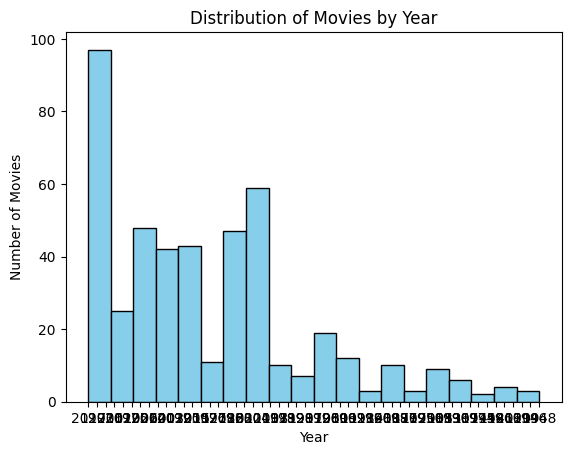

In [772]:
#using matplotlib to plot the histogram to see the distribution of the movies by year

import matplotlib.pyplot as plt

plt.hist(movie_df['year'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies by Year')
plt.show()
